# Grupo

| RA | Nome |
| :---------------- | :------: |
| 200109 | Leonardo Dimarchi Souza da Cruz |
| 200359 | Luiz Fernando Toquetto |
| 224072 | Vinícius Martins Granso |

# Bibliotecas

In [29]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from tensorflow import keras

# Dataset

O dataset escolhido foi o [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009). Ele possui informações de variáveis físico-químicas (são as entradas) e dados sensoriais (sáida).

In [30]:
# Lendo o dataset
dataset_original = pd.read_csv('winequality-red.csv')

# Análise Exploratória de Dados (EDA)

In [31]:
# Exibindo algumas informações dos atributos
dataset_original.info()

# Exibindo as 5 primeiras linhas do dataset
display(dataset_original.head())

# Exibindo algumas estatísticas dos atributos
dataset_original.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


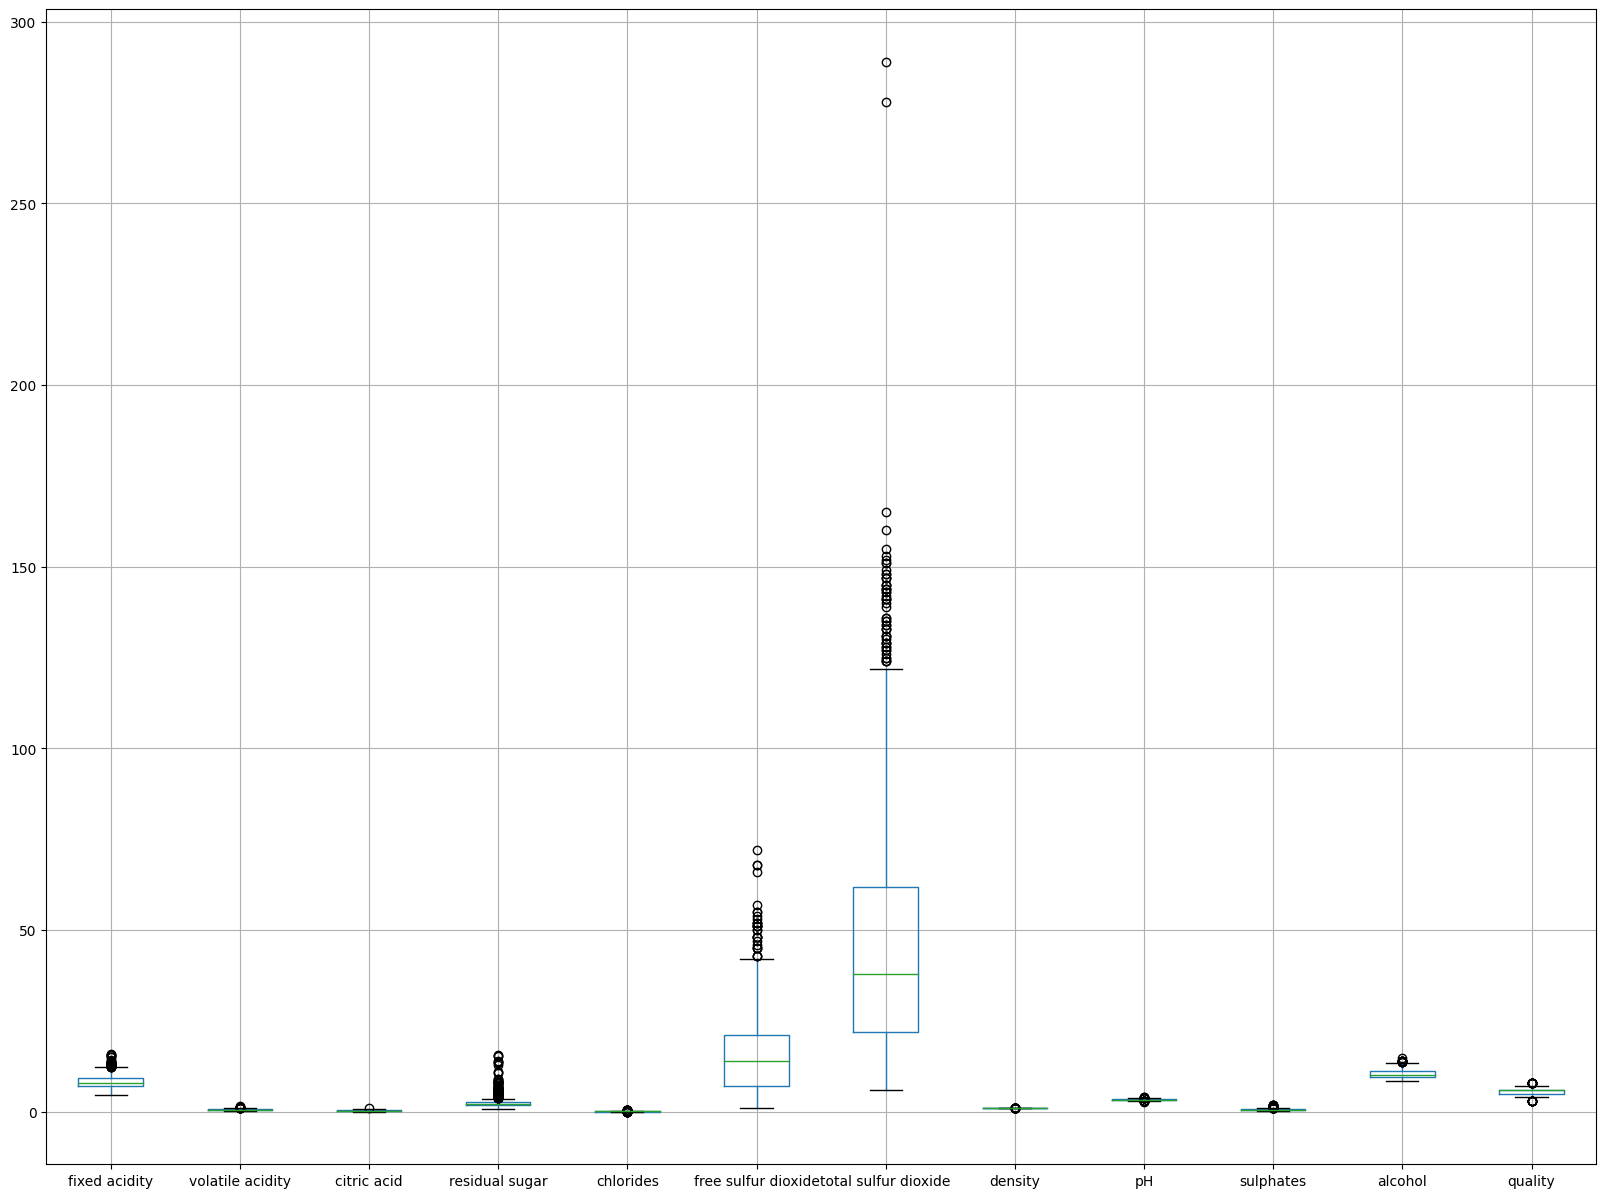

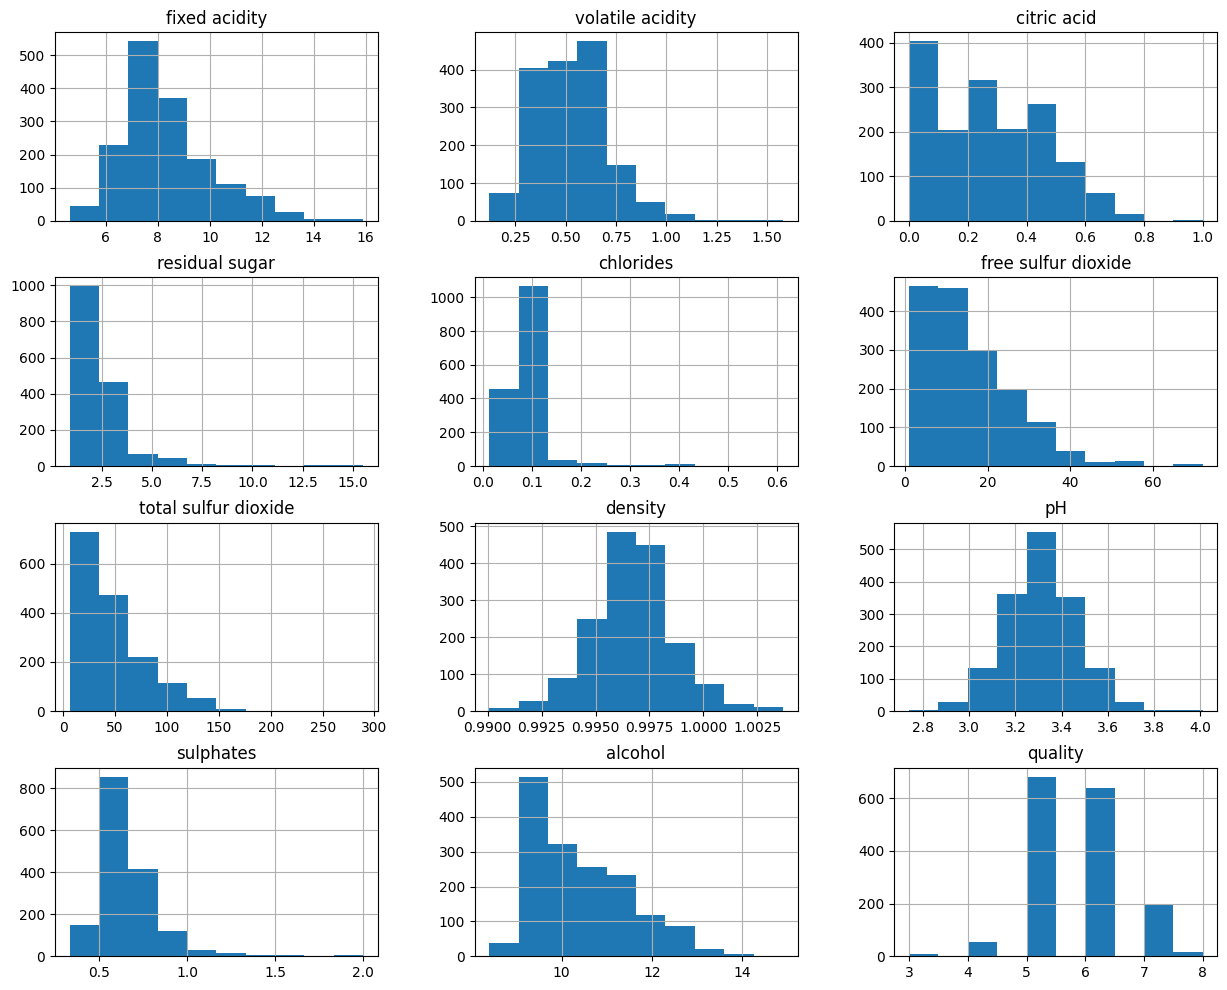

In [32]:
# Gerando diagrama de caixa
dataset_original.boxplot(figsize=(20,15))

# Gerando histograma
dataset_original.hist(bins=10,figsize=(15,12))

plt.show()

Com a visualização do dataset, podemos entender o que cada atributo significa, com a ajuda do fórum de discussões do Kaggle para as colunas menos intuitivas.

Variáveis ​​de entrada (com base em testes físico-químicos):

- **fixed acidity**: float
- **volatile acidity**: float
- **citric acid**: float
- **residual sugar**: float
- **chlorides**: float
- **free sulfur dioxide**: float
- **total sulfur dioxide**: float
- **density**: float
- **pH**: float
- **sulphates**: float
- **alcohol**: float

Variável de saída (com base em dados sensoriais)

- **quality**: integer

# Análise dos atributos

In [33]:
# Verificando dados nulos
soma_de_nulos_por_atributo = dataset_original.isnull().sum();
print(soma_de_nulos_por_atributo)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Não existem valores nulos em nenhum dos atributos deste dataset.


# Pré-processamento

### Correlação

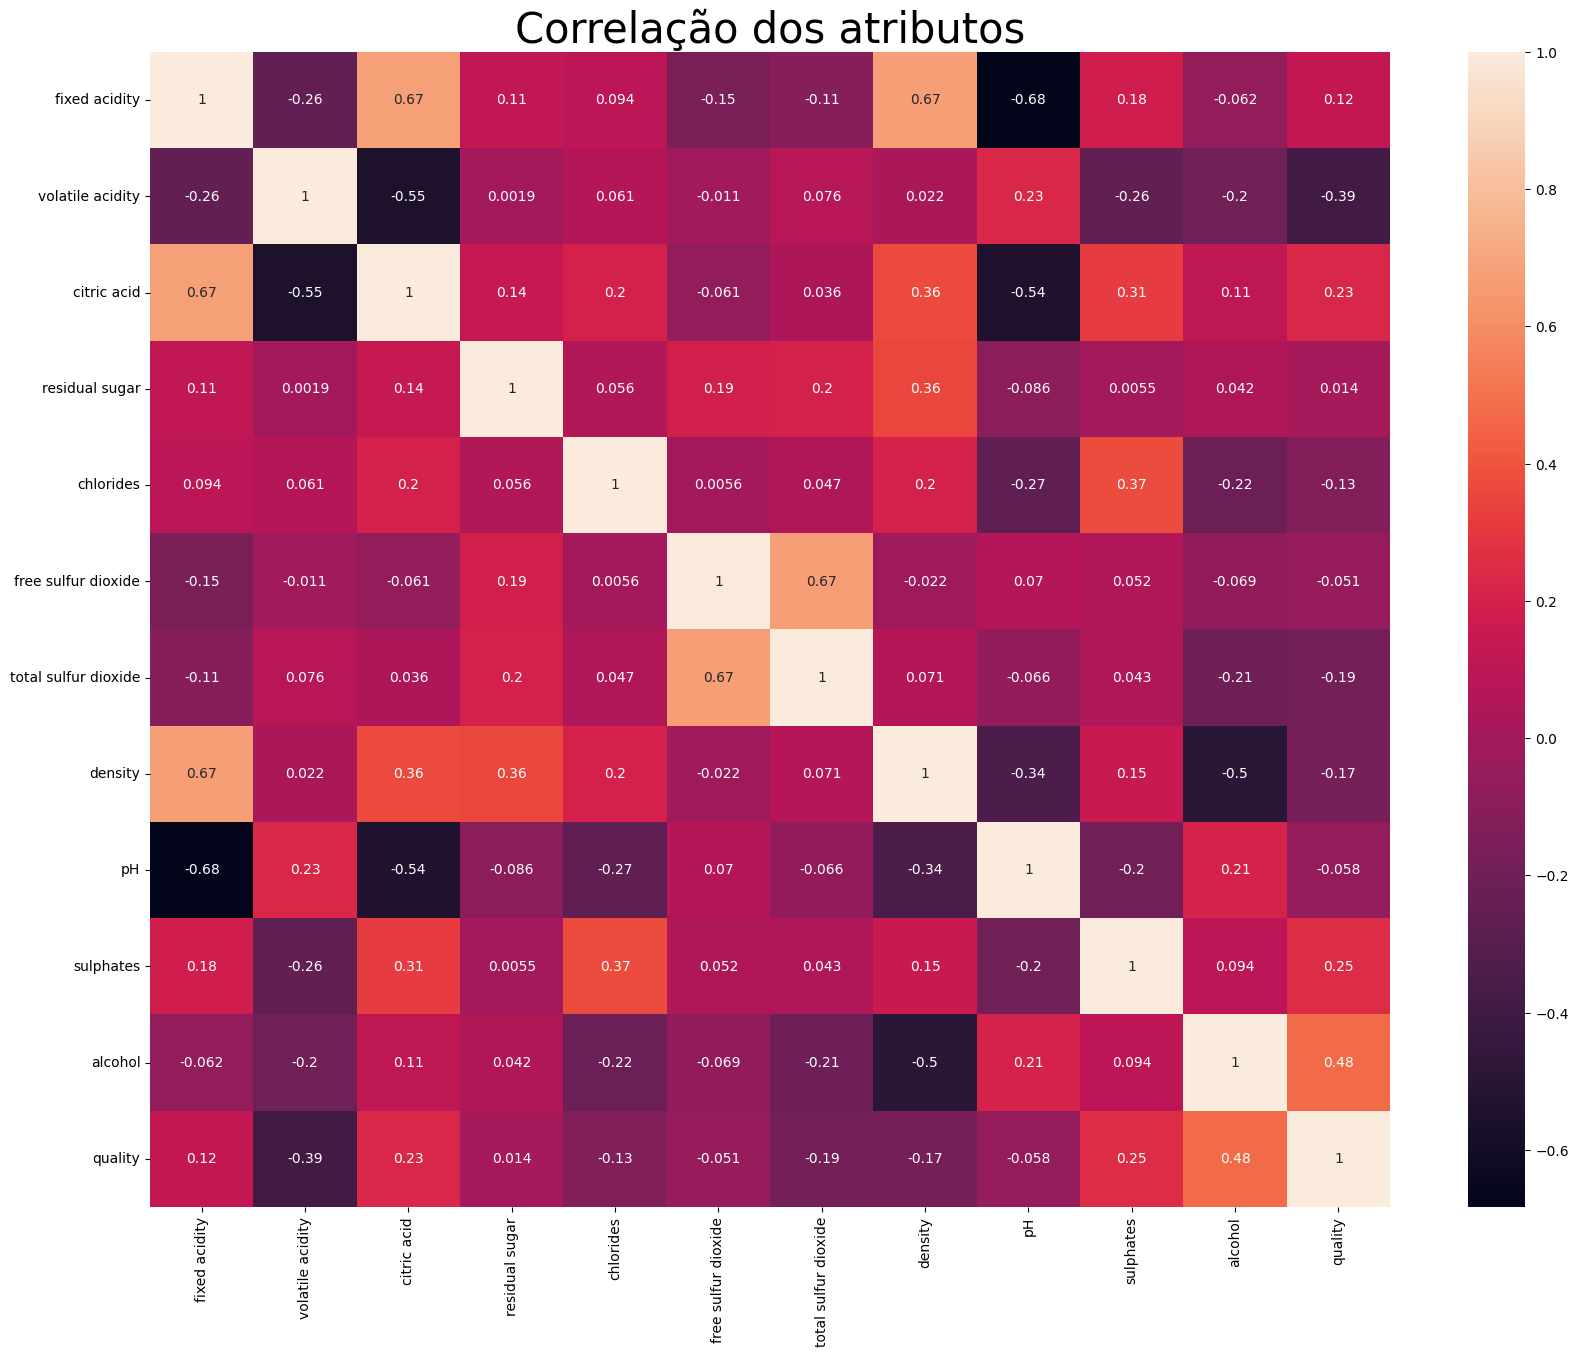

In [34]:
# Realizando a cópia do dataset para manter a cópia original 
dataset = dataset_original.copy()

# Calculando o mapa de correlação
mapa_de_correlacao = dataset.corr()

# Plotando o mapa de correlação
plt.figure(figsize=(20,15))
sns.heatmap(mapa_de_correlacao, annot=True)
plt.title("Correlação dos atributos",fontsize=30)
plt.show()


Plotamos o heatmap da correlação dos atributos para identificar quais são mais relevantes para determinar a quailidade do vinho. 

- As colunas **alcohol** e **sulphates** são as colunas que se correlacionam melhor com a qualidade do vinho.

### Remoção de atributos

In [35]:
# Removendo os atributos com baixa correção
dataset_pos_remocao_colunas = dataset.drop(['residual sugar', 'free sulfur dioxide', 'pH', 'density'], axis=1)

# Exibindo as dimensões do dataset
print(dataset_pos_remocao_colunas.shape)

(1599, 8)


In [36]:
# Verifique se há dados duplicados
duplicados = dataset_pos_remocao_colunas[dataset_pos_remocao_colunas.duplicated()]

# Exibição dos dados duplicados
print("Dados duplicados:")
print(duplicados.shape)

dataset_pos_remocao_colunas.drop_duplicates(inplace=True)

Dados duplicados:
(240, 8)


Dado a análise das informações apresentadas até o momento, removeremos os atributos **residual sugar**, **free sulfur dioxide**, **pH** e **density** por conta de seus valores terem pouca influência/significância sobre o atributo **qualidade**.

### Separação dos dados de treino/teste

In [37]:
# Categorizando qualidade do vinho
# A partir do histograma traçado acima, vamos considerar valores entre 5 e 6 como qualidade média
def qualidade(valor):
    if valor < 5:
        # Qualidade ruim
        return 1 
    elif valor == 5 or valor == 6:
        # Qualidade média
        return 2 
    else:
        # Qualidade boa
        return 3 
    
# Aplicando categorização na coluna de qualidade
dataset_pos_remocao_colunas['quality'] = dataset_pos_remocao_colunas['quality'].apply(qualidade)

# Removendo a coluna "quality" para manter apenas os atributos
X = dataset_pos_remocao_colunas.drop(['quality'], axis=1)

# Coluna target
y = dataset_pos_remocao_colunas['quality']

# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

# Adicionando escalonamento nos dados
# Por baixo dos panos, é feito o seguinte:
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelos 

### Naive Bayes

accuracy: 0.78


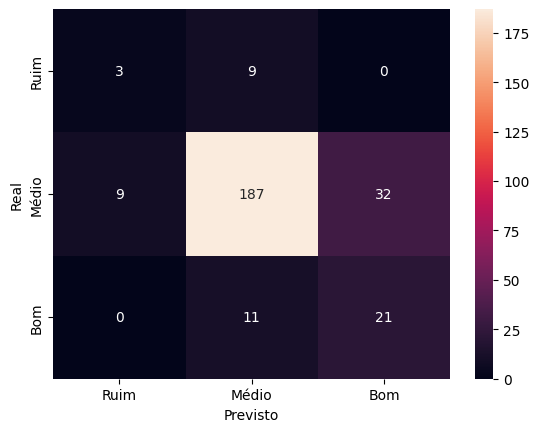

In [38]:
# Iniciando treino
model = GaussianNB()
model.fit(X_train, y_train)

# Iniciando teste
y_pred = model.predict(X_test)

# Acurácia
accuracy = accuracy_score(y_test, y_pred)

print(f'accuracy: {accuracy:.2f}')

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
labels=['Ruim', 'Médio', 'Bom']

sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels,)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

### KNN

accuracy: 0.83


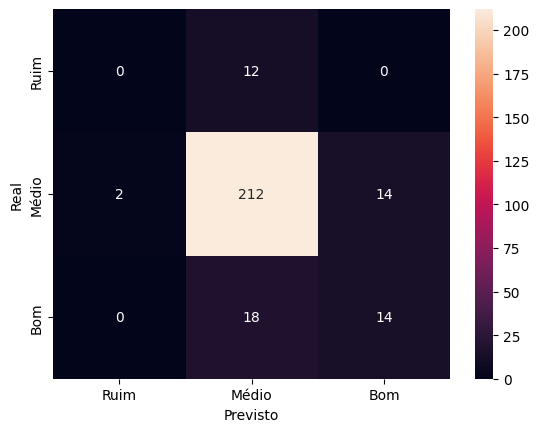

In [39]:
# Iniciando treino
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

# Iniciando teste
y_pred = knn.predict(X_test)

# Acurácia
accuracy = accuracy_score(y_test, y_pred)

print(f'accuracy: {accuracy:.2f}')

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
labels=['Ruim', 'Médio', 'Bom']

sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels,)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

### Redes neurais

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 7)                 15        
 tion)                                                           
                                                                 
 dense_4 (Dense)             (None, 3)                 24        
                                                                 
 dense_5 (Dense)             (None, 3)                 12        
                                                                 
Total params: 51 (208.00 Byte)
Trainable params: 36 (144.00 Byte)
Non-trainable params: 15 (64.00 Byte)
_________________________________________________________________
Epoch 1/100
21/21 [==============================] - 0s 7ms/step - loss: 1.2251 - accuracy: 0.2827 - val_loss: 1.1493 - val_accuracy: 0.3741
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 

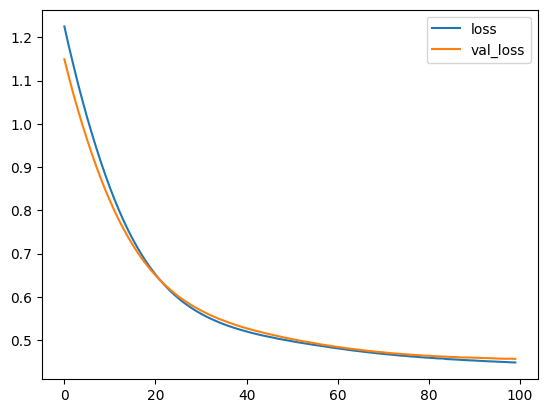

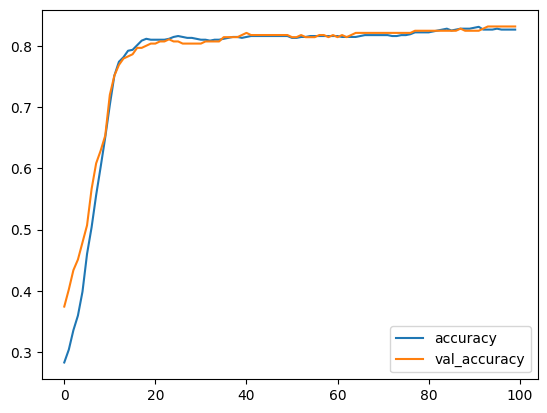

['loss', 'accuracy']
[0.40899646282196045, 0.8406862616539001]


In [40]:
# Transformando cada categoria da qualidade em novas colunas
y = pd.get_dummies(dataset_pos_remocao_colunas['quality'], columns=['quality'])

# Separando os dados novamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando normalização
normalizer = keras.layers.experimental.preprocessing.Normalization()
normalizer.adapt(X_train)

# Criando layers
model = keras.Sequential([
    normalizer,
    keras.layers.Dense(3, activation='tanh'),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

# Configuração
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Iniciando treino
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split = 0.3,
    verbose=1
)

# Iniciando teste
y_pred = model.predict(X_test).reshape(-1)

# Acurácia
losses = pd.DataFrame(history.history)
losses[['loss','val_loss']].plot()
losses[['accuracy','val_accuracy']].plot()

plt.show()

print(model.metrics_names)
print(model.evaluate(X_test, y_test, verbose=0))

# Conclusões sobre os modelos

Comparando os modelos, podemos indicar que o Naive Bayes obteve uma acurácia menor (78%) que o KNN (83%), por conta das colunas serem do tipo float. Além disso, o KNN se comporta muito bem em poucas dimensões, que seria nosso caso.

Ou seja, para que o Naive Bayes conseguisse entregar uma acurácia maior, teríamos de testar mais implementações de tratativas ao dataset, tal como a discretização dos valores.

Para a rede neural, que chegou em uma acurácia interessante de 84%, utilizamos uma camada interna com tanh e uma camada de saída com softmax. Seu desempenho, considerando a acurácia, ficou pouco acima do KNN.

Sendo assim, com base nesses testes, iríamos utilizar a rede neural para solucionar o problema, testando e implementando mais técnicas para melhorar ainda mais a acurácia. Seria interessante também buscar por mais dados para treinar a rede neural, já que ela pode trabalhar melhor com datasets maiores.